In [ ]:
# Install necessary libraries
!pip install --upgrade transformers torch sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 792.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Import required libraries
from tqdm import tqdm
from google.colab import drive
import pandas as pd
from IPython.display import display
from google.colab import drive

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Define the path to the CSV file containing the data
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/data/processed/random_selected_articles_summaries_gpt_ner.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

Mounted at /content/drive


In [ ]:
# Import necessary libraries for model loading and text similarity calculation
import torch
from transformers import BartTokenizer, BartForConditionalGeneration
from sentence_transformers import SentenceTransformer, util

# Load the BART model and tokenizer for summarization
bart_model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(bart_model_name)
model = BartForConditionalGeneration.from_pretrained(bart_model_name)

# Load the SentenceTransformer model for semantic similarity
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Function to calculate similarity score between article and summary using cosine similarity
def calculate_similarity(article, summary):
    """
    Calculate cosine similarity between an article and its summary.
    
    Parameters:
    - article (str): The original article text.
    - summary (str): The provided summary text.

    Returns:
    - float: The cosine similarity score between the article and the summary.
    """
    # Compute embeddings for both article and summary
    embeddings = similarity_model.encode([article, summary])

    # Calculate cosine similarity
    cosine_similarity = util.cos_sim(embeddings[0], embeddings[1])
    return cosine_similarity.item()


# Initialize a list to store results
results = []

# Loop through each row of the DataFrame to calculate similarity for all articles and summaries
for _, row in tqdm(df.iterrows()):  # tqdm for progress bar during iteration
    article = row['cleaned_article']  # Extract cleaned article text
    summary = row['ner_summary']  # Extract corresponding summary text

    # Calculate similarity
    similarity_score = calculate_similarity(article, summary)

    # Append the results to the list
    results.append({
        "Provided Summary": summary,
        "Similarity Score": similarity_score
    })

# Convert the results to a DataFrame for better display
results_df = pd.DataFrame(results)

# Display the results in tabular format
print(results_df)

293it [01:53,  2.58it/s]

                                      Provided Summary  Similarity Score
0    Poland’s near-total abortion ban has led to an...          0.688577
1    Cardinal John Tong, Apostolic Administrator of...          0.505841
2    The article discusses the state of sex educati...          0.869058
3    Jillaine St. Michel, a 37-year-old woman from ...          0.508953
4    In the context of the global COVID-19 crisis, ...          0.806177
..                                                 ...               ...
288  The Pueblo City Council’s recent decision to i...          0.798587
289  The Pueblo City Council’s decision to indefini...          0.945551
290  The article discusses the looming increase in ...          0.605317
291  Indiana’s six abortion clinics have ceased pro...          0.474974
292  Julia Rynkiewicz, a 24-year-old Catholic stude...          0.680311

[293 rows x 2 columns]


In [ ]:
# Display the results DataFrame for further analysis
display(results_df)

,Provided Summary,Similarity Score
0,Poland’s near-total abortion ban has led to an...,0.688577
1,"Cardinal John Tong, Apostolic Administrator of...",0.505841
2,The article discusses the state of sex educati...,0.869058
3,"Jillaine St. Michel, a 37-year-old woman from ...",0.508953
4,"In the context of the global COVID-19 crisis, ...",0.806177
...,...,...
288,The Pueblo City Council’s recent decision to i...,0.798587
289,The Pueblo City Council’s decision to indefini...,0.945551
290,The article discusses the looming increase in ...,0.605317
291,Indiana’s six abortion clinics have ceased pro...,0.474974


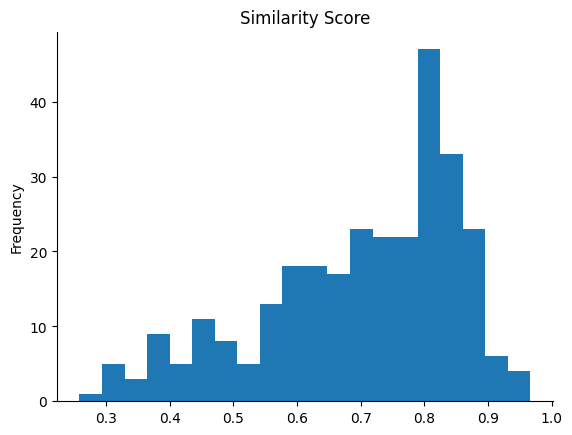

In [ ]:
# Visualize the similarity score distribution as a histogram
from matplotlib import pyplot as plt
# Plot the similarity scores using a histogram
results_df['Similarity Score'].plot(kind='hist', bins=20, title='Similarity Score')
# Hide the top and right spines for a cleaner plot
plt.gca().spines[['top', 'right',]].set_visible(False)